# Example 1: Introducing the Water Table Fluctuation (WTF) Method

*R.A. Collenteur, July 2025*

This notebook is meant to introduce the WTFPy package and learn how to use it to estimate groundwater recharge from the groundwater table fluctuations. 

The general procedure to estimate the recharge is as follows:

0. Import Python packages
1. Load the head data
2. Extract recharge events
3. Estimate recharge
4. Analyze the results

## 0. Import Python packages

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wtf_py as wtf

wtf.show_versions()

wtf_py: 0.1.0
pandas: 2.3.1
numpy: 2.3.1
scipy: 1.16.0
matplotlib: 3.10.3


## Load the data

The first step is to load the water table data and rainfall data that we want to use to estimate the groundwater recharge for.

<Axes: xlabel='Date'>

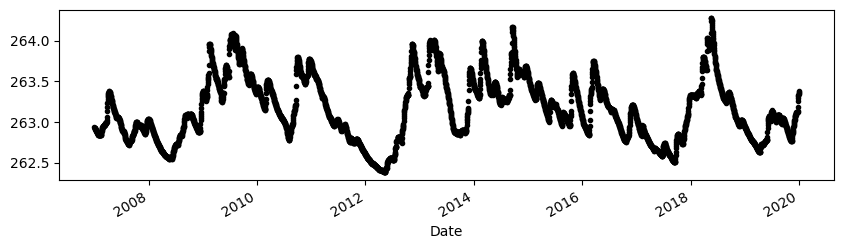

In [18]:
wt = (
    pd.read_csv(
        "data/data_wagna/head_wagna.csv", index_col=0, parse_dates=True, skiprows=2
    )
    .squeeze()
    .resample("D")
    .mean()
).loc["2007":]

wt = wt.dropna()
wt.plot(marker=".", linestyle=" ", color="k", figsize=(10, 2.5))

## Create a first Model

We can now develop a simple model to estimate the groundwater recharge. 

<Axes: >

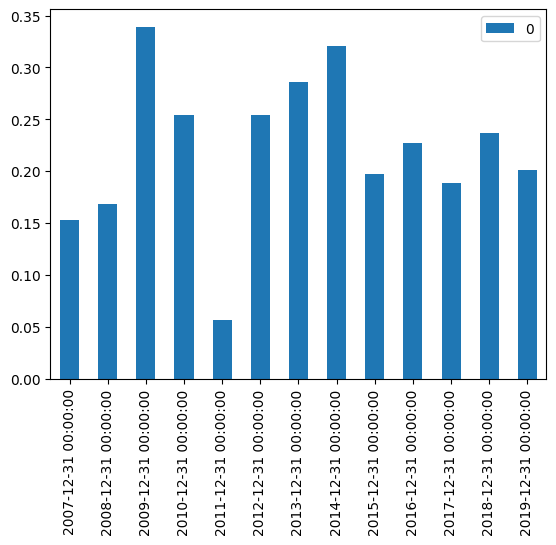

In [19]:
ml1 = wtf.Model(wt, name="Wagna")

sy = 0.144  # Specific yield

# Estimate the groundwater recharge
r1 = ml1.estimate_recharge(rise_rule="rises", sy=sy)
r1.resample("YE").sum().plot(kind="bar")

## Model with only rises and MCR

<Axes: >

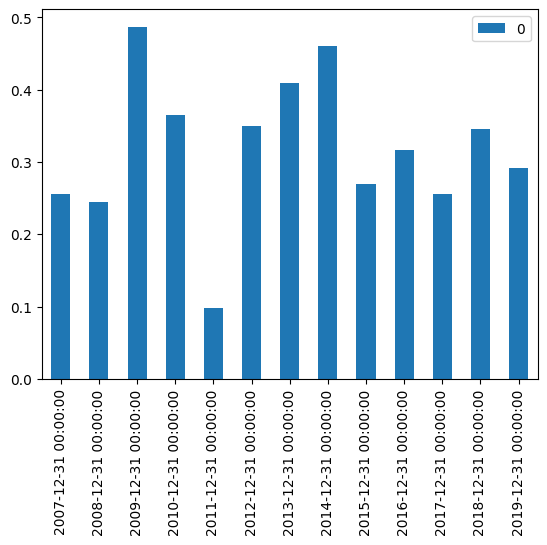

In [ ]:
ml2 = wtf.Model(wt, name="Wagna", mcr=wtf.MCR())
ml2.mcr.fit_mcr(wt)

# Estimate the groundwater recharge
r2 = ml2.estimate_recharge(rise_rule="rises", sy=sy)
r2.resample("YE").sum().plot(kind="bar")
#
# ml.rise_method.get_extrapolated(wt, events_int).plot(label="MCR extrapolation")

## Model with rises and falls and MCR

<Axes: >

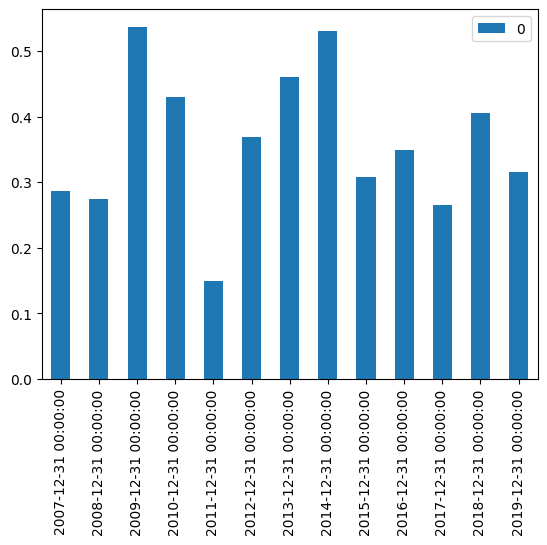

In [ ]:
ml3 = wtf.Model(wt, name="Wagna", mcr=wtf.MCR())
ml3.mcr.fit_mcr(wt)

# Estimate the groundwater recharge
r3 = ml3.estimate_recharge(rise_rule="both", sy=sy)
r3.resample("YE").sum().plot(kind="bar")

## Theory




$R = S_y \frac{\Delta h}{\Delta T}$

where $\Delta H$ is the head change over the time period $\Delta T$, and $S_y$ is the specific yield. The specific yield needs to be provided by the user, preferably including uncertainty estimates. The changes in head over time are estimated using one of the methods available from `wtf_py`. 

**Prerequisites / Assumptions**

- Water table fluctuations are the result of variations in groundwater recharge.
- A good estimate of the specific yield is available.
- 
- ...



### 1. Extract events

### 3. Estimate recharge

AttributeError: 'IntervalIndex' object has no attribute 'itertuples'

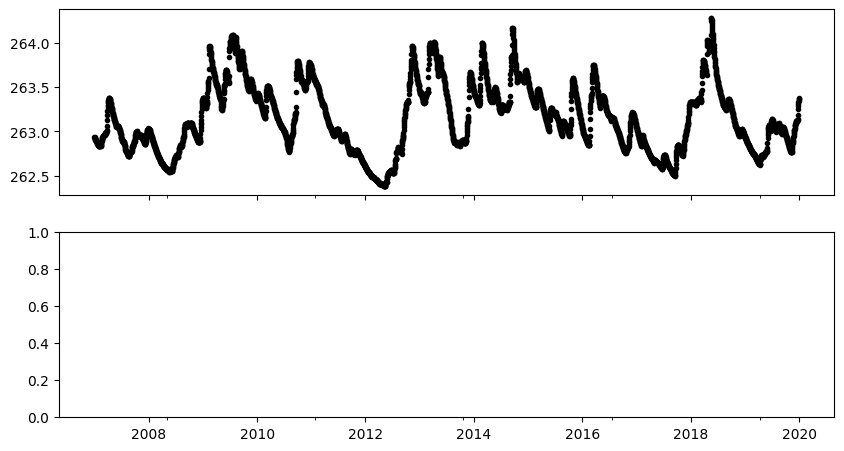

In [24]:
ml1.plot()